# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
<p align="justify">
    What can we say about key factors that contribute to a movie's commercial success before its release? Can we predict which movies will be highly rated by critics and audiences? Given the high-stakes nature of modern filmmaking, understanding success factors is crucial. That's why the TMDb Movie Dataset is considered a rich source for exploring various facets of the film industry. With information about 10,000 movies, data on the plot, cast, budget, and revenues, we can start digging in to several important questions.
</p>

### Columns

<ul>
    <li><strong>id: </strong>Unique identifier for each movie.</li>
    <li><strong>imdb_id: </strong>IMDb ID of the movie.</li>
    <li><strong>popularity: </strong>Popularity score assigned by TMDb.</li>
    <li><strong>budget: </strong>Budget of the movie in US dollars.</li>
    <li><strong>revenue: </strong>Revenue generated by the movie in US dollars.</li>
    <li><strong>originl_title: </strong>Original title of the movie.</li>
    <li><strong>cast: </strong>List of actors and actresses in the movie.</li>
    <li><strong>homepage: </strong>Official homepage of the movie.</li>
    <li><strong>director: </strong>Name of the director.</li>
    <li><strong>tagline: </strong>Tagline of the movie.</li>
    <li><strong>keywords: </strong>Keywords associated with the movie.</li>
    <li><strong>overview: </strong>Brief description of the movie.</li>
    <li><strong>runtime: </strong>Runtime of the movie in minutes.</li>
    <li><strong>genres: </strong>Genres of the movie.</li>
    <li><strong>production_companies: </strong>Production companies involved in the movie.</li>
    <li><strong>release_date: </strong>Release date of the movie.</li>
    <li><strong>vote_count: </strong>Number of votes the movie received.</li>
    <li><strong>vote_average: </strong>Average vote rating for the movie.</li>
    <li><strong>release_year: </strong>Year of release.</li>
    <li><strong>budget_adj: </strong>Budget in terms of 2010 dollars, accounting for inflation over time.</li>
    <li><strong>revenue_adj: </strong>Revenue in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>


### Question(s) for Analysis

<p align="justify">
    The film industry is a complex and dynamic ecosystem influenced by multiple factors. By analyzing a rich dataset of several thousand movies, we can delve into the intricate interplay of these factors. This analysis aim to explore the following questions:
</p>

<ol>
    <li>How have movie ratings and revenue changed over time?</li>
    <li>Which genres consistently generate the highest revenue?</li>
    <li>Which directors and production companies are associated with high-revenue movies?</li>
    <li>How do factors like budget, runtime, and release date influence revenue?</li>
</ol>

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
tmdb_df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

#Print the first few lines 
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Print out the size of the DataFrame 
#(Number of rows and columns)
tmdb_df.shape

(10866, 21)

In [6]:
#Inspect the DataFrame and DataTypes
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Get basic statistical summaries
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#Check for missing values
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Check for duplicates
tmdb_df.duplicated().sum()

1

<p align="justify">
    Initial inspection of the dataset revealed a relatively clean dataset with variant amounts of missing values in some columns. In addition, a single duplicate row has been identified and shall be dealt with as well. 
</p> 
<p align="justify">
    Therefore, the subsequent data cleaning process will focus on handling missing values, addressing duplicates, and ensuring data consistency across various fields.
</p>


### Data Cleaning
 
### 1. Dropping Unnecessary Columns

The `id`, `imdb_id`, and `overview` columns uniquely identify each record but do not offer insights into the data, therefore, do not provide any analytical value. That's why we can safely drop these columns.

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
tmdb_df.drop(['id', 'imdb_id', 'overview'], axis=1, inplace=True)

### 2. Dropping Columns with High Missing Value Rates

Due to the high proportion of missing data in the `homepage`, `tagline`, and `keywords` columns, and their uncertain contribution to the analysis, we'll remove them to focus on more informative and vital features.

In [11]:
tmdb_df.drop(['homepage', 'tagline', 'keywords'], axis=1, inplace=True)

### 3. Handling Missing Values in Categorical Columns

By filling missing values in categorical columns like `cast`, `director`, `genres`, and `production_companies` with 'missing', we can retain all remaining data points and still conduct meaningful analysis.

In [12]:
tmdb_df['cast'].fillna('missing', inplace=True)
tmdb_df['director'].fillna('missing', inplace=True)
tmdb_df['genres'].fillna('missing', inplace=True)
tmdb_df['production_companies'].fillna('missing', inplace=True)

### 4. Removing Duplicates

In [13]:
tmdb_df.drop_duplicates(inplace=True)

<p align="justify">
    Let's have a look on the dataset now!
</p>

In [14]:
tmdb_df.shape

(10865, 15)

In [15]:
tmdb_df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
tmdb_df.duplicated().sum()

0

### 5. Data Type Optimization

In [17]:
#Use .info() to view the current data types and the memory usage
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10865 non-null  object 
 8   production_companies  10865 non-null  object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

Currently the DataFrame is a mixture of objects, float64, and int64 data types. We can also see the memory usage - `1.3+ MB`

Let's see what values are present in the `*_adj` columns

In [18]:
tmdb_df.budget_adj.value_counts()

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
1.062090e+08       1
3.347892e+07       1
3.665348e+07       1
2.225390e+06       1
1.276423e+05       1
Name: budget_adj, Length: 2614, dtype: int64

In [19]:
tmdb_df.revenue_adj.value_counts()

0.000000e+00    6016
1.177534e+08       2
1.438914e+07       2
1.000000e+06       2
2.910640e+07       2
                ... 
2.043403e+07       1
6.497291e+06       1
8.160074e+07       1
1.186042e+08       1
8.061618e+07       1
Name: revenue_adj, Length: 4840, dtype: int64

Even though the DataFrame labels it as `float64`, when runnigna quick check on each one they return `int64`. 
Therefore, let's optimize it.

In [20]:
tmdb_df["budget_adj"] = tmdb_df["budget_adj"].astype("int")
tmdb_df["revenue_adj"] = tmdb_df["revenue_adj"].astype("int")

In [21]:
#Check data type and memory usage changes
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10865 non-null  object 
 8   production_companies  10865 non-null  object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  int64  
 14  revenue_adj           10865 non-null  int64  
dtypes: float64(2), int6

That did not change anything. Let's use `describe()` to view the minimum and maximum values of each one of them.

In [22]:
#Inspect minimum and maximum values of budget_adj and revenue_adj
tmdb_df[["budget_adj", "revenue_adj"]].describe()

,budget_adj,revenue_adj
count,1.086500e+04,1.086500e+04
mean,1.754989e+07,5.136900e+07
std,3.430753e+07,1.446383e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.085325e+07,3.370173e+07
max,4.250000e+08,2.827124e+09


As its maximum value falls within the range of `int32`, let's change the `budget_adj` data type to `int32`. But first, let's define a function that helps us do the job!

In [23]:
#Function to change the datatype
def changeDType(column, new_type):
    tmdb_df[column] = tmdb_df[column].astype(new_type)

In [24]:
changeDType("budget_adj", "int32")

And do the same with other nummerical columns, after inspecting their minimum/maximum values.

In [25]:
#Inspect minimum and maximum values of all columns
tmdb_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [26]:
changeDType("popularity", "float32")
changeDType("budget", "int32")
changeDType("runtime", "int32")
changeDType("vote_count", "float32")

We can also notice that the `release_date` is not in its appropriate format. Let's change it.

In [27]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

Let's have a look on the DataFrame now!

In [28]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float32       
 1   budget                10865 non-null  int32         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10865 non-null  object        
 5   director              10865 non-null  object        
 6   runtime               10865 non-null  int32         
 7   genres                10865 non-null  object        
 8   production_companies  10865 non-null  object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  float32       
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

We can notice a change in our memory usage from `1.3 MB` to `1.1 MB`, by changing how we store our numerical values.

### 6. Splitting Pipe-Separated Values to Lists

Some columns like `cast`, `genres`, and `production_companies` contain values separated by pipe (|) characters. Therefore, we need to split combined values into a list of individual values.

In [29]:
tmdb_df['cast'] = tmdb_df['cast'].str.split('|')
tmdb_df['genres'] = tmdb_df['genres'].str.split('|')
tmdb_df['production_companies'] = tmdb_df['production_companies'].str.split('|')

Let's see how the DataFrame looks like.

In [30]:
tmdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985764,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562.0,6.5,2015,137999939,1392445892
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185.0,7.1,2015,137999939,348161292
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480.0,6.3,2015,101199955,271619025
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292.0,7.5,2015,183999919,1902723129
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947.0,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Temporal Trends

This section investigates the question: "How have movie ratings and revenue changed over time? Are there specific years or decades with exceptional movie performances?".


To answer this, we have to investigate three variables: `release_year`, `vote_average`, and `revenue_adj`. 

**NOTE**: The reason why we are using the `revenue_adj` and not the `revenue` column is because how crucial it is to consider the impact of inflation. This is important for conducting meaningful comparisions and accurate trends analysis.

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Group data by release year and calculate average rating and total revenue
df_grouped = tmdb_df.groupby('release_year').agg({'vote_average': 'mean', 'revenue_adj': 'sum'})

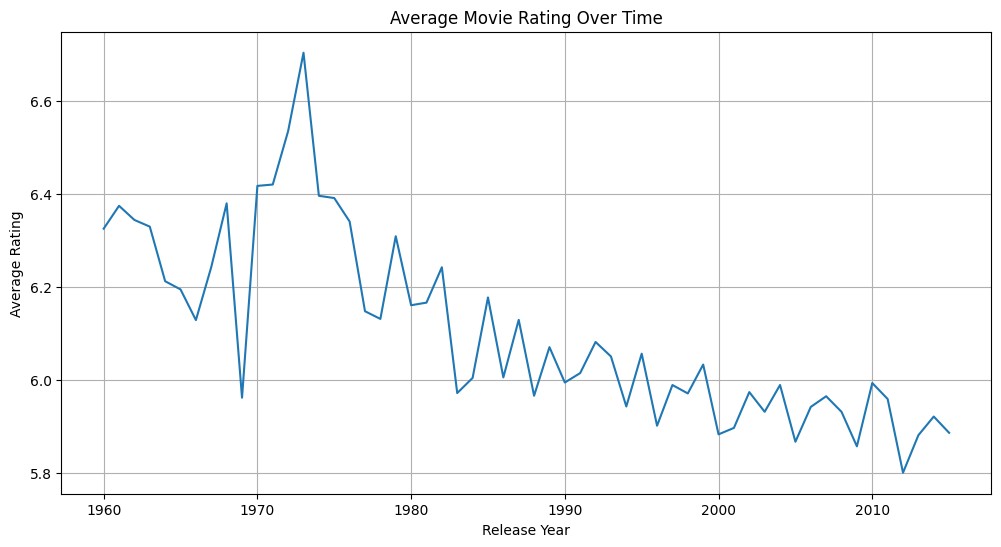

In [32]:
# Create Time Series Plot for average rating
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['vote_average'])
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Time')
plt.grid(True)
plt.show()

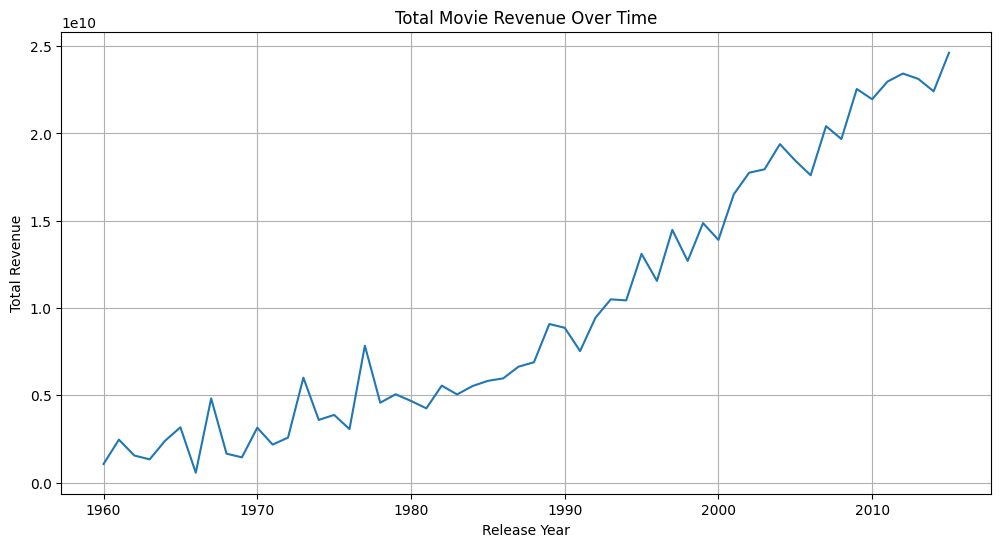

In [33]:
# Create Time Series Plot for total revenue
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['revenue_adj'])
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.title('Total Movie Revenue Over Time')
plt.grid(True)
plt.show()

Based on the plots above, we can conclude the following:
1. Average Movie Rating Over Time:
* The plot shows a fluctuating trend in average movie ratings over the years.
* There's no consistent upward or downward trend.
* Certain years might have seen higher (like year 1973) or lower (like year 1969) average ratings.

2. Total Movie Revenue Over Time:
* The plot indicates an overall upward trend in total movie revenue over the years.
* There are fluctuations within this upward trend.

### Question 2: Genre Analysis

This section investigates the question: "Which genres consistently generate the highest revenue? How have genre preferences and revenue potential evolved over time?".

To gain insights into genre performance, we'll break down the `genres` column using Panda's `.explode()`, allowing for a detailed analysis of each genre.

In [34]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Create a new DataFrame by exploding genres
genre_df = tmdb_df.explode('genres')

#Print the first few rows
genre_df.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985764,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562.0,6.5,2015,137999939,1392445892
0,32.985764,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562.0,6.5,2015,137999939,1392445892
0,32.985764,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562.0,6.5,2015,137999939,1392445892
0,32.985764,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562.0,6.5,2015,137999939,1392445892
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185.0,7.1,2015,137999939,348161292
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Adventure,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185.0,7.1,2015,137999939,348161292
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Science Fiction,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185.0,7.1,2015,137999939,348161292
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185.0,7.1,2015,137999939,348161292
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,Adventure,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480.0,6.3,2015,101199955,271619025
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,Science Fiction,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480.0,6.3,2015,101199955,271619025


Now let's do some analysis!

But first, since we're always customizing our plots, let us define a function that simplifies the process!

In [35]:
def plotting(x_label, y_label, title, grid=False):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(grid)
    plt.show()

**A. Analyzing Total Revenue by Genre**

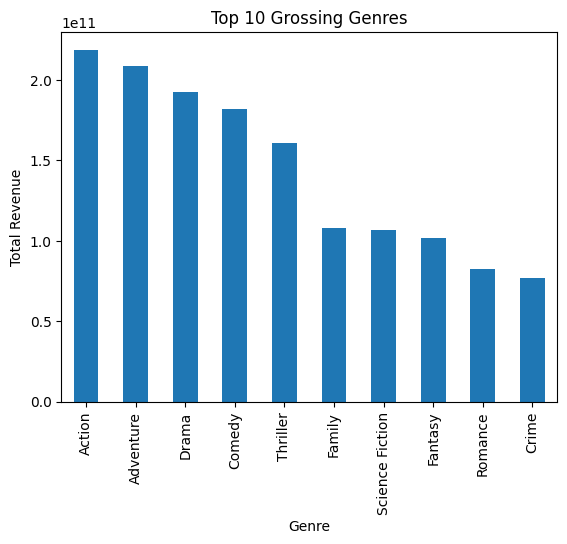

In [36]:
#Calculate total revenue by genre
genre_total_revenue = genre_df.groupby('genres')['revenue_adj'].sum().sort_values(ascending=False)

#Visualize top-grossing genres
genre_total_revenue.head(10).plot(kind='bar')
plotting('Genre', 'Total Revenue', 'Top 10 Grossing Genres')

**B. Analyzing Average Revenue by Genre**

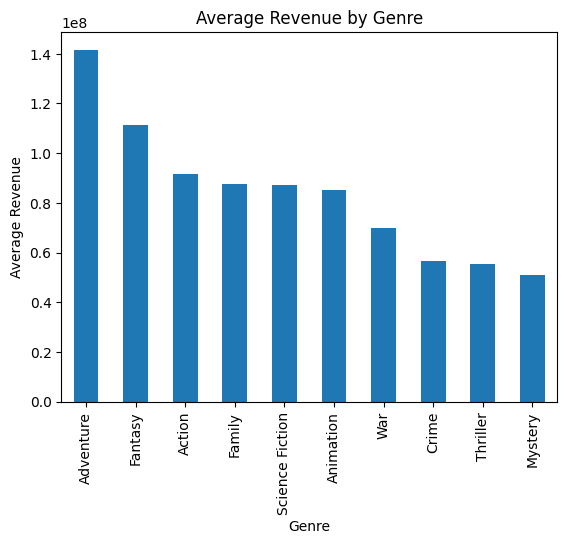

In [37]:
#Calculate average revenue by genre
genre_avg_revenue = genre_df.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False)

#Visualize average revenue by genre
genre_avg_revenue.head(10).plot(kind='bar')
plotting('Genre', 'Average Revenue', 'Average Revenue by Genre')

**C. Analyzing Genre Popularity**

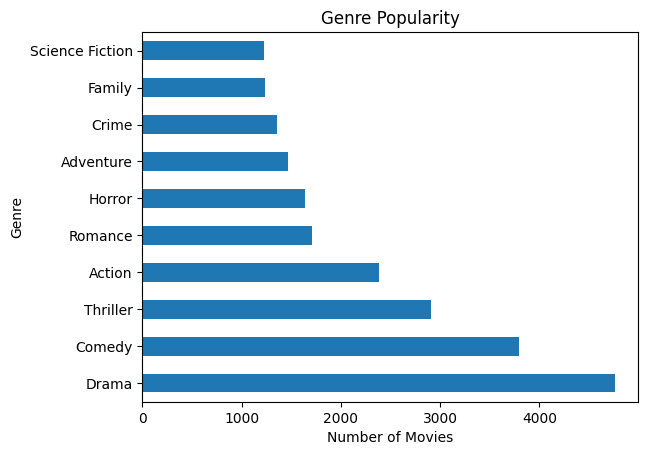

In [38]:
#Count the number of movies in each genre
genre_counts = genre_df['genres'].value_counts()

#Visualize genre popularity
genre_counts.head(10).plot(kind='barh')
plotting('Number of Movies', 'Genre', 'Genre Popularity')

**D. Analyzing Genre Trends Over Time**

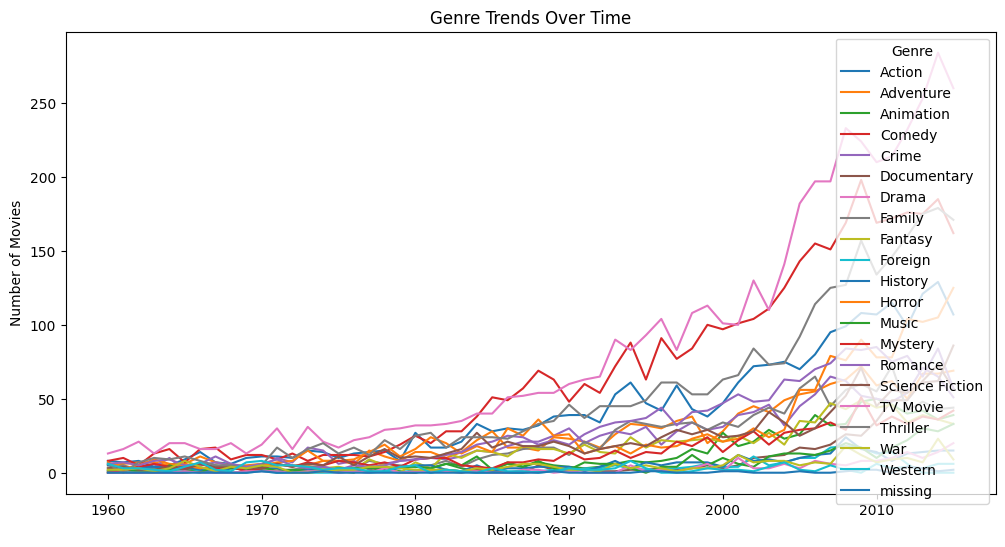

In [39]:
# Group the data by release year and genre
genre_year_df = genre_df.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Create a pivot table to reshape the data
genre_year_pivot = genre_year_df.pivot_table(index='release_year', columns='genres', values='count', fill_value=0)

# Plot the trend of each genre over time
genre_year_pivot.plot(figsize=(12, 6))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Genre Trends Over Time')
plt.legend(title='Genre')
plt.show()

Based on the resulted visualizations, we can point out the following observations:
* Genres like `Drama`, `Comedy`, and `Action` consistently rank among the top-grossing genres.
* While traditional genres continue to dominate, we can see a growing fame of genres like `Science Fiction` and `Fantasy`.
* Popularity of different genres has fluctuated over time. Genres like `Drama` and `Comedy` have maintained a strong presence throughout the years, while genres like `Science Fiction` and `Fantasy` have experienced significant growth in recent decades.
* The film industry has become increasingly diversified, with a wider range of genres attracting audiences.

### Question 3: Industry Players

This section investigates the question: "Which directors and production companies are associated with high-revenue movies? Are there specific studio-director collaborations that consistently yield high-revenue films?".

We can investigate the first part of this question in two steps:


**1. Calculate total revenue for each director**

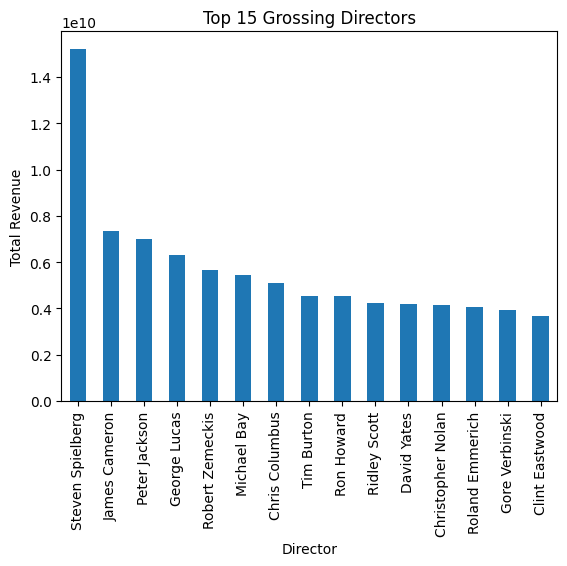

In [40]:
#Top-Grossing Directors
top_directors = tmdb_df.groupby('director')['revenue_adj'].sum().sort_values(ascending=False)

#Visualize Top-Grossing Directors
top_directors.head(15).plot(kind='bar')
plotting('Director', 'Total Revenue', 'Top 15 Grossing Directors')

**2. Calculate total revenue for each production company**

As the `production_companies` column contains a list of values, we must explode it first.

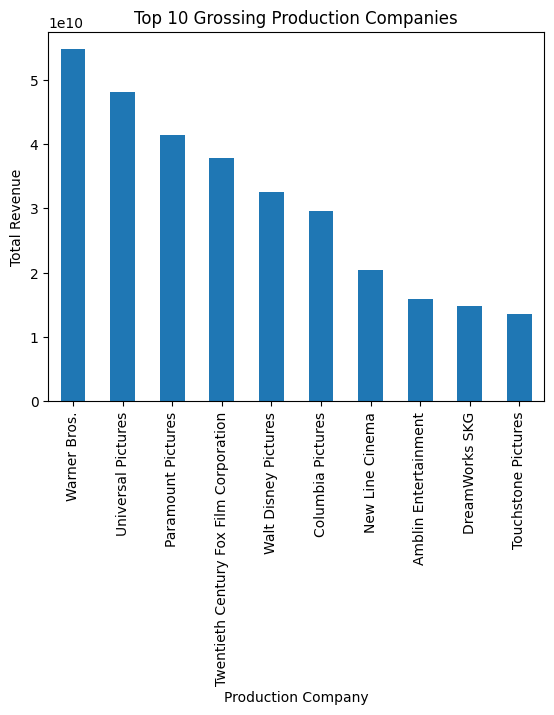

In [41]:
#Create a new DataFrame by exploding production_companies
pc_df = tmdb_df.explode('production_companies')

#Top Production Companies
pc_revenue = pc_df.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)

#Visualize Top Production Companies
pc_revenue.head(10).plot(kind='bar')
plotting('Production Company', 'Total Revenue', 'Top 10 Grossing Production Companies')

As for the second part of the question, "Are there specific studio-director collaborations that consistently yield high-revenue films?", we can, again, investigate it in two steps:

**1. Create a new column that combines the production company and director names**

**NOTE**: We will use a copy of the original DataFrame to maintain a consistant copy.

In [42]:
#Create a copy of the original DataFrame to avoid modifying it
df_copy = pc_df.copy()

#Create a new column for studio-director collaborations
df_copy['studio_director_combo'] = df_copy['production_companies'] + '-' + df_copy['director']

**2. Group, Aggregate, and Visualize**

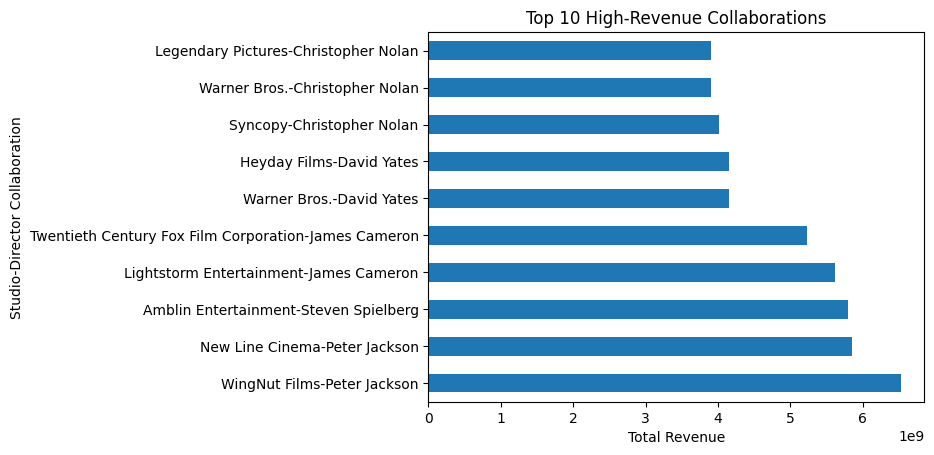

In [43]:
#Group by collaboration and calculate total revenue
collaboration_revenue = df_copy.groupby('studio_director_combo')['revenue'].sum().sort_values(ascending=False)

#Visualize Top-Performing Collaborations
collaboration_revenue.head(10).plot(kind='barh')
plotting('Total Revenue', 'Studio-Director Collaboration', 'Top 10 High-Revenue Collaborations')

The most significant observation that we can conclude from the above analysis is the importance of a strong partnership between studios and directors, that often leads to significant commercial success. By consistently collaborating with talented directors, studios can increase their chances of producing commercially successful movies.

### Question 4: Movie Characteristics

This section investigates the question: "How do factors like budget, runtime, and release date influence revenue?".

Taking into consideration the different impact each variable has on the revenue, investigating this question would requires multiple analysis approaches. Let's do it!

**1. Correlation Anlysis**

Computing the correlation coefficients between `budget`, `runtime`, `release_year`, and `revenue` provides us with valuable insights into the realtaionships between those variables. To visualize this correlation, we will draw a correlation matrix.

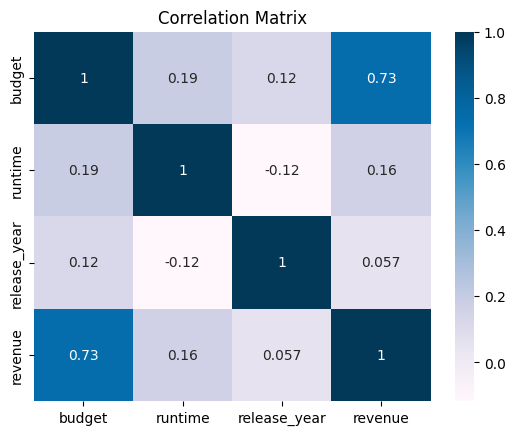

In [44]:
#Correlation Matrix
corr_matrix = tmdb_df[['budget', 'runtime', 'release_year', 'revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
plt.title('Correlation Matrix')
plt.show()

Unlike other variables (`runtime` and `release_year`), `budget` shows a Positive Correlation with `revenue`, as their correlation coefficient is ~1. This implies a strong relationship between them. 

Let's investigate this relationship further!

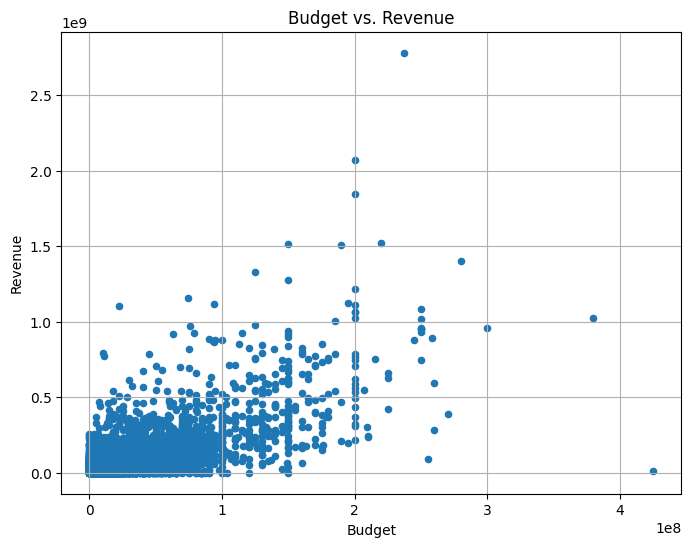

In [45]:
#Create a scatter plot for Budget vs. Revenue
tmdb_df.plot.scatter(x='budget', y='revenue', figsize=(8, 6))
plotting('Budget', 'Revenue', 'Budget vs. Revenue', True)

This could take us somewhere! Let's dig deeper into it!

Let us split budget into differnet categories (i.e. `Low`, `High`, etc.), then plot the distribution of revenue across different budget ranges.

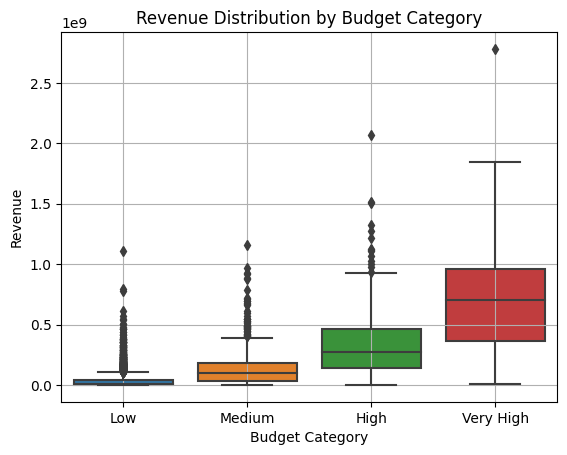

In [46]:
#Create a copy of the original DataFrame to avoid modifying it
df_copy2 = tmdb_df.copy()

#Create a new column for movies budget_category 
df_copy2['budget_category'] = pd.cut(tmdb_df['budget_adj'], bins=[0, 50000000, 100000000, 200000000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

#Plot revenue distibution across differnet budget categories
sns.boxplot(x='budget_category', y='revenue', data=df_copy2)
plot_attributes('Budget Category', 'Revenue', 'Revenue Distribution by Budget Category', True)

**2. Seasonal Patterns Analysis**

Analyzing the distribution of movie releases and revenue across differnet months of the year could help us identify seasonal patterns. If certain months are more favorable for movie releases and can drive revenue, this analysis could give us a start to understanding this. 

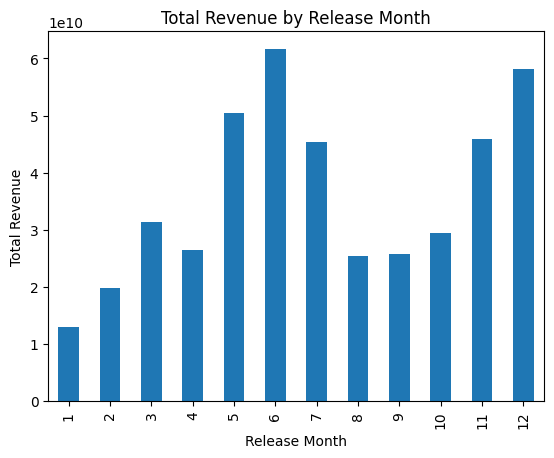

In [47]:
#Using the copy we made in the first section,
#we will create a new column for movies release_month 
df_copy2['release_month'] = df_copy2['release_date'].dt.month

#Group data by release month and calculate total revenue
monthly_revenue = df_copy2.groupby('release_month')['revenue'].sum()

#Plot monthly revenue
monthly_revenue.plot(kind='bar')
plotting('Release Month', 'Total Revenue', 'Total Revenue by Release Month')

Based on the results obtained, we were able to observe the following:
1. A strong correlation exists between `budget` and `revenue`,which suggests that higher budget films tend to generate higher revenue.
2. There was significant variability within each budget category, which strongly indicates that budget alone is not a perfect predictor of revenue.
3. Certain months tend to have higher total revenue than others. This could be due to factors like holiday seasons, school breaks, etc.

<a id='conclusions'></a>
## Conclusions

In this analysis, we delved into the intricate factors that contribute to the success of films. By exploring various aspects such as temporal trends, genre analysis, industry players, and the impact of different key variables, we gained valuable insights into the film industry and the revenue drivers. 

### Summary of Findings

**1. Temporal Trends:**
* Movie ratings have fluctuated over time without a clear upward or downward trend.
* Total movie revenue has shown an overall upward trend, with fluctuations within.

**2. Genre Analysis:**
* Traditional genres like Drama, Comedy, and Action continue to dominate the box office.
* Emerging genres like Science Fiction and Fantasy are gaining popularity.
* Genre preferences and revenue potential are dynamic and evolve over time.

**3. Industry Players:**
* Strong studio-director collaborations can significantly impact box office success.
* Major studios and famous directors play a crucial role in driving industry trends.

**4. Factors Influencing Revenue:**
* Budget is a significant factor in determining a film's revenue potential.
* Seasonal patterns can impact a film's revenue, with certain months being more favorable for releases.

### Key Conclusions

A combination of factors, including budget, genre, director, cast, production company, and release timing, collectively contribute to a film's commercial success. The film industry is constantly evolving, with new genres emerging and gaining popularity. Staying updated with audience preferences is crucial for success. Strong partnerships between studios and directors can significantly impact box office returns. Leveraging data analysis to understand audience preferences, market trends, and film performance can inform strategic decisions.

### Limitations and Future Research

While working colsely on this dataset, a number of limitations that hindered the analysis arose, and therefore, it is important to acknowledge them. The data used in this analysis may not be comprehansive, and there could be biases in the dataset. Additionally, external factors like economic conditions, cultural events, and technological advancements that can influence film performance were not taking into consideration.

To further understand the factors that influence revenue, future research could explore the following:
1. **Impact of Marketing and Promotion**: Analyze the effectiveness of different marketing strategies and their impact on box office performance and movie popularity.
2. **Role of Social Media**: Investigate the impact of social media on film buzz and ticket sales.
3. **Technological Advancements**: Analyze the impact of technological advancements in filmmaking, distribution, and audience consumption on revenue and audience preferences. This includes computer-generated imagery, virtual reality, and artificial intelligence.
4. **Advanced Statistical Techniques**: Utilize advanced statistical techniques like machine learning to predict box office success more accurately.

## Submitting your Project 

In [48]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1154692 bytes to Investigate_a_Dataset.html
